In [13]:
api_key = '........'
secret = '........'

In [14]:
!pip install python-binance mplfinance


In [15]:
#import the necessities
from binance import Client, ThreadedDepthCacheManager, ThreadedWebsocketManager
import pandas as pd

In [16]:
client = Client(api_key, secret) #authenticate through the binance the api key and the secret key

In [ ]:
#  [
#   [
#     1499040000000,      // Open time
#     "0.01634790",       // Open
#     "0.80000000",       // High
#     "0.01575800",       // Low
#     "0.01577100",       // Close
#     "148976.11427815",  // Volume
#     1499644799999,      // Close time
#     "2434.19055334",    // Quote asset volume
#     308,                // Number of trades
#     "1756.87402397",    // Taker buy base asset volume
#     "28.46694368",      // Taker buy quote asset volume
#     "17928899.62484339" // Ignore.
#   ]
# ]

In [35]:
price_history = client.get_historical_klines('ADAUSDT', Client.KLINE_INTERVAL_1DAY, '1 Jan 2011')

In [36]:
#convert to dataframe
dfprice_history = pd.DataFrame(price_history)
dfprice_history.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1523923200000,0.25551000,0.28800000,0.23983000,0.24260000,67462293.24000000,1524009599999,17411823.57157960,42568,28228665.39000000,7281513.06137010,0
1,1524009600000,0.24260000,0.26460000,0.24201000,0.26200000,31328095.79000000,1524095999999,7922134.28304330,21684,15082512.84000000,3818068.82632840,0
2,1524096000000,0.26199000,0.27500000,0.25777000,0.27004000,50859980.22000000,1524182399999,13609907.89978870,32600,23934593.69000000,6408750.31190170,0
3,1524182400000,0.27004000,0.30442000,0.26648000,0.30108000,71084276.49000000,1524268799999,20270887.70351350,46506,35262790.18000000,10040840.12777730,0
4,1524268800000,0.30161000,0.30700000,0.26509000,0.28668000,92719842.91000000,1524355199999,26539390.12720960,55256,43517191.79000000,12413648.37070700,0


In [42]:
#rename the columns
dfprice_history.columns = ['open time', 'open', 'high', 'low', 'close', 'volume', 'close time', 'quote asset volume', 
                    'number of trades', 'tb base volume', 'tb quote volume', 'ignore']
dfprice_history.head()

,open time,open,high,low,close,volume,close time,quote asset volume,number of trades,tb base volume,tb quote volume,ignore
0,1523923200000,0.25551000,0.28800000,0.23983000,0.24260000,67462293.24000000,1524009599999,17411823.57157960,42568,28228665.39000000,7281513.06137010,0
1,1524009600000,0.24260000,0.26460000,0.24201000,0.26200000,31328095.79000000,1524095999999,7922134.28304330,21684,15082512.84000000,3818068.82632840,0
2,1524096000000,0.26199000,0.27500000,0.25777000,0.27004000,50859980.22000000,1524182399999,13609907.89978870,32600,23934593.69000000,6408750.31190170,0
3,1524182400000,0.27004000,0.30442000,0.26648000,0.30108000,71084276.49000000,1524268799999,20270887.70351350,46506,35262790.18000000,10040840.12777730,0
4,1524268800000,0.30161000,0.30700000,0.26509000,0.28668000,92719842.91000000,1524355199999,26539390.12720960,55256,43517191.79000000,12413648.37070700,0


In [43]:
# convert the datatypes: from object to dates
dfprice_history['open time'] = pd.to_datetime(dfprice_history['open time']/1000, unit = 's')
dfprice_history['close time'] = pd.to_datetime(dfprice_history['close time']/1000, unit = 's')
dfprice_history.dtypes

open time             datetime64[ns]
open                          object
high                          object
low                           object
close                         object
volume                        object
close time            datetime64[ns]
quote asset volume            object
number of trades               int64
tb base volume                object
tb quote volume               object
ignore                        object
dtype: object

In [44]:
dfprice_history.head()

,open time,open,high,low,close,volume,close time,quote asset volume,number of trades,tb base volume,tb quote volume,ignore
0,2018-04-17,0.25551000,0.28800000,0.23983000,0.24260000,67462293.24000000,2018-04-17 23:59:59.999000064,17411823.57157960,42568,28228665.39000000,7281513.06137010,0
1,2018-04-18,0.24260000,0.26460000,0.24201000,0.26200000,31328095.79000000,2018-04-18 23:59:59.999000064,7922134.28304330,21684,15082512.84000000,3818068.82632840,0
2,2018-04-19,0.26199000,0.27500000,0.25777000,0.27004000,50859980.22000000,2018-04-19 23:59:59.999000064,13609907.89978870,32600,23934593.69000000,6408750.31190170,0
3,2018-04-20,0.27004000,0.30442000,0.26648000,0.30108000,71084276.49000000,2018-04-20 23:59:59.999000064,20270887.70351350,46506,35262790.18000000,10040840.12777730,0
4,2018-04-21,0.30161000,0.30700000,0.26509000,0.28668000,92719842.91000000,2018-04-21 23:59:59.999000064,26539390.12720960,55256,43517191.79000000,12413648.37070700,0


In [46]:
# convert the dtypes: correct the numeric datatypes
number_columns = ['open', 'high', 'low', 'close', 'volume', 'quote asset volume', 'tb base volume', 'tb quote volume']
dfprice_history[number_columns] = dfprice_history[number_columns].apply(pd.to_numeric, axis=1)
dfprice_history.dtypes

open time             datetime64[ns]
open                         float64
high                         float64
low                          float64
close                        float64
volume                       float64
close time            datetime64[ns]
quote asset volume           float64
number of trades               int64
tb base volume               float64
tb quote volume              float64
ignore                        object
dtype: object

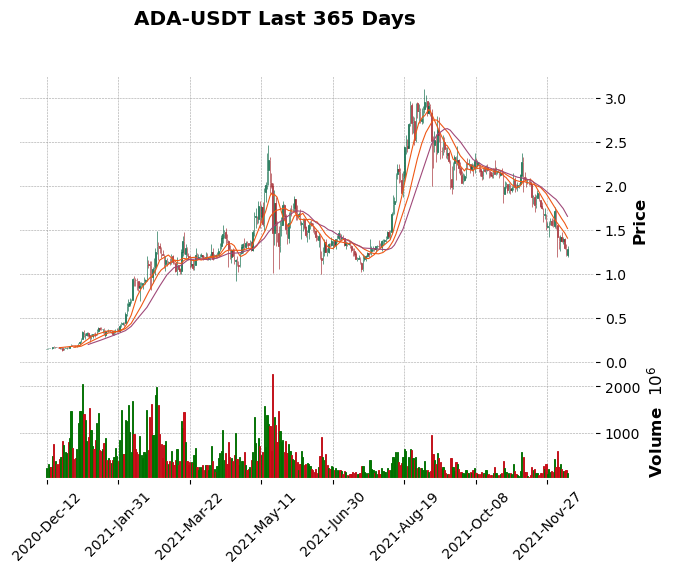

In [48]:
import mplfinance as mpf
mpf.plot(dfprice_history.set_index('close time').tail(365), 
        type='candle', style='charles', 
        volume=True, 
        title='ADA-USDT Last 365 Days', 
        mav=(10,20,30))

dfprice_history.to_csv('ADA_price_history.csv', index = False)